In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#the dataset aims to predict the whether a given banknote is authentic given a number of measures taken from a photograph. 
#it is a binary classification problem where 0 is the label for an authentic banknote while 1 for a fake one.
banknoteData = pd.read_csv('/content/drive/MyDrive/MachineLearning/datasets/data_banknote_authentication.csv')
banknoteData.head()

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# To find the correlation among the columns using pearson method
#correlation with the variable with itself = 1
#The correlation coefficient is +1 in the case of a perfect direct (increasing) linear relationship (correlation), 
# −1 in the case of a perfect inverse (decreasing) linear relationship (anti-correlation)
#the correlation is used to check if multicollinearity is present leading the logistic regression to poor performance. We should remove those variables which are highly correlated.
#varibles with correlation value 0.7 and 0.9 are highly correlated. Variables with correlation value between 0.9 and 1 are very highly correlated. 
banknoteData.corr(method ='pearson')

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image,Class
Variance of Wavelet Transformed image,1.000000,0.264026,-0.380850,0.276817,-0.724843
Skewness of Wavelet Transformed image,0.264026,1.000000,-0.786895,-0.526321,-0.444688
Kurtosis of Wavelet Transformed image,-0.380850,-0.786895,1.000000,0.318841,0.155883
Entropy of image,0.276817,-0.526321,0.318841,1.000000,-0.023424
Class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [ ]:
def normalize(X):
  mins = np.min(X, axis = 0)
  maxs = np.max(X, axis = 0)
  rng = maxs - mins
  norm_X = 1 - ((maxs - X)/rng)
  return norm_X
#suppose that initially we want to use just 2 inputs to predict if the banknote is true or false. 
# Here we use variance of wavelet transformed image and  Skewness of Wavelet Transformed image
x1 = banknoteData.loc[:,'Variance of Wavelet Transformed image'].values
x2 = banknoteData.loc[:,'Skewness of Wavelet Transformed image'].values
y = banknoteData.loc[:,'Class'].values

x1 = normalize(x1)
x2 = normalize(x2)

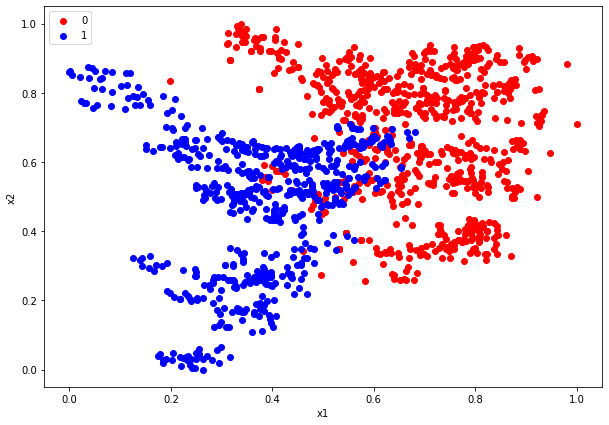

In [ ]:
class0x1 = []
class0x2 = []
class1x1 = []
class1x2 = []
classy0 = []
classy1 = []
for x_1,x_2,y_i in zip(x1,x2,y):
  if y_i == 0:
    class0x1.append(x_1)
    class0x2.append(x_2)
    classy0.append(y_i)
  else:
    class1x1.append(x_1)
    class1x2.append(x_2)
    classy1.append(y_i)
  
plt.figure(figsize=(10,7))
plt.scatter(class0x1, class0x2, label='0', c='r')
plt.scatter(class1x1, class1x2, label='1', c='b')
plt.legend(loc="upper left")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
dict = {'Variance of Wavelet Transformed image':x1,'Skewness of Wavelet Transformed image':x2}
X = pd.DataFrame(data=dict)
Y = banknoteData[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2, shuffle=True)
print('N.samples in training set: ', len(X_train))
print('N.samples in test set: ', len(X_test))

N.samples in training set:  1097
N.samples in test set:  275


#Logistic Regression#

In [ ]:
#sigmoid function
def logistic_function(pred):
  p = 1/(1+np.exp(-pred))
  return p

def logts_reg(x1,x2,B0,B1,B2):
  lr_out = B0+B1*x1+B2*x2
  return lr_out

def get_pred(pred):
  y_pred_a = 0
  if pred < 0.5: y_pred_a = 0
  else: y_pred_a = 1 
  return y_pred_a
  
#to estimate the coefficients we use SGD
#alpha = learning rate
def SGD(X,Y,alpha, n_epochs):
  B0 = B1 = B2 = 0
  l_likelihood = 0
  log_like = 0
  acc_arr = []
  l_lhoods = []
  for epoch in range(n_epochs):
    tot_correct = 0
    tot_pred = 0
    for (index,x),(index2,y) in zip(X.iterrows(),Y.iterrows()):
      x1 = x['Variance of Wavelet Transformed image']
      x2 = x['Skewness of Wavelet Transformed image']
      y_true = y['Class']
      lr_out = logts_reg(x1,x2,B0,B1,B2)
      y_pred =  logistic_function(lr_out)
      #log likelihhod
      step1 = y_true*np.log(y_pred)
      step2 =(1-y_true)*np.log(1-y_pred)
      l_likelihood1 = -step1-step2
      #parameters updating
      B0 = B0+alpha*(y_true - y_pred)
      B1 = B1+alpha*(y_true - y_pred)*x1
      B2 = B2+alpha*(y_true - y_pred)*x2
      #accuracy 
      y_pred_a = get_pred(y_pred)
      if y_pred_a == y_true: tot_correct+=1
      tot_pred +=1

    log_like = np.mean(l_likelihood1)
    l_lhoods.append(log_like)
    accuracy = tot_correct/tot_pred
    acc_arr.append(accuracy)
    print('>epoch=%d, lrate=%.3f, log likelihood=%.3f, accuracy=%.3f' % (epoch, lr, log_like,accuracy))
  
  return B0,B1,B2,l_lhoods,acc_arr


In [ ]:
n_epochs = 500
lr = 0.001
B0,B1,B2,l_lhoods,acc_arr = SGD(X_train,y_train,lr,n_epochs)
print(' end training phase ---------------------------------------------')
print('B0:',B0)
print('B1', B1)
print('B2', B2)

>epoch=0, lrate=0.001, log likelihood=0.738, accuracy=0.559
>epoch=1, lrate=0.001, log likelihood=0.763, accuracy=0.560
>epoch=2, lrate=0.001, log likelihood=0.775, accuracy=0.560
>epoch=3, lrate=0.001, log likelihood=0.777, accuracy=0.560
>epoch=4, lrate=0.001, log likelihood=0.775, accuracy=0.560
>epoch=5, lrate=0.001, log likelihood=0.769, accuracy=0.560
>epoch=6, lrate=0.001, log likelihood=0.760, accuracy=0.560
>epoch=7, lrate=0.001, log likelihood=0.751, accuracy=0.560
>epoch=8, lrate=0.001, log likelihood=0.740, accuracy=0.567
>epoch=9, lrate=0.001, log likelihood=0.730, accuracy=0.576
>epoch=10, lrate=0.001, log likelihood=0.719, accuracy=0.578
>epoch=11, lrate=0.001, log likelihood=0.708, accuracy=0.592
>epoch=12, lrate=0.001, log likelihood=0.697, accuracy=0.602
>epoch=13, lrate=0.001, log likelihood=0.686, accuracy=0.607
>epoch=14, lrate=0.001, log likelihood=0.676, accuracy=0.616
>epoch=15, lrate=0.001, log likelihood=0.665, accuracy=0.626
>epoch=16, lrate=0.001, log likeli

*comparison with Sklearn model*

In [ ]:
from sklearn.linear_model import LogisticRegression
y_train_ = y_train.values.ravel()
lgr = LogisticRegression()
lgr.fit(X_train,y_train_)
B0_sk = lgr.intercept_[0]
B1_sk,B2_sk = lgr.coef_[0]
print('B0 sklearn:', B0_sk)
print('B1 sklearn:', B1_sk)
print('B2 sklearn:', B2_sk)

B0 sklearn: 7.450236844603907
B1 sklearn: -9.581538982504199
B2 sklearn: -4.581161744725583


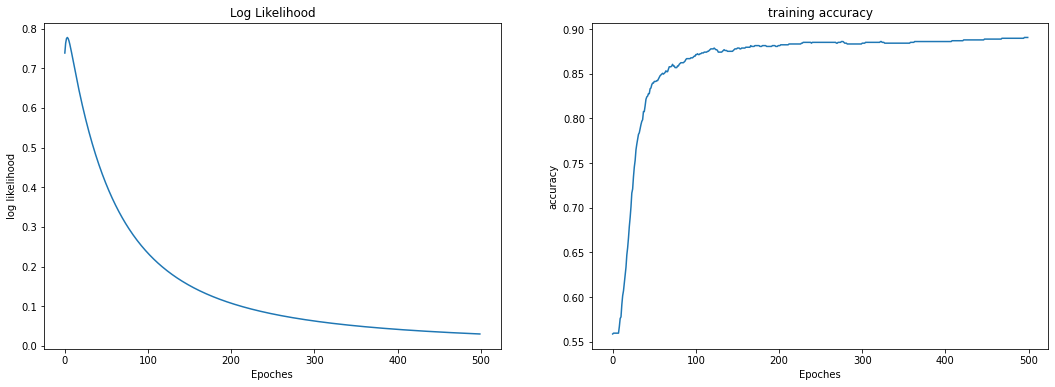

In [ ]:
n_epoches = [x for x in range(0,n_epochs)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
ax1.plot(n_epoches,l_lhoods)
ax1.set_xlabel('Epoches')
ax1.set_ylabel('log likelihood')
ax1.set_title('Log Likelihood')

ax2.plot(n_epoches,acc_arr)
ax2.set_xlabel('Epoches')
ax2.set_ylabel('accuracy')
ax2.set_title('training accuracy')
plt.show()

**Test Phase**

In [ ]:
def test_phase(B0, B1, B2,X,Y):
  correct_preds = 0
  tot_preds = 0
  y_preds = []
  y_preds_plot = []
  for (index,x),(index2,y) in zip(X.iterrows(),Y.iterrows()):
    x1 = x['Variance of Wavelet Transformed image']
    x2 = x['Skewness of Wavelet Transformed image']
    y_true = y['Class']
    lr_out = logts_reg(x1,x2,B0,B1,B2)
    y_pred =  logistic_function(lr_out)
    if y_pred < 0.5: y_pred = 0
    else: y_pred = 1
    #computing accuracy of the model
    if y_pred == y_true: correct_preds+=1
    tot_preds +=1
    y_preds.append(y_pred)
  print(f'model accuracy: {correct_preds/tot_preds}')
  return y_preds

y_preds = test_phase(B0, B1, B2,X_test,y_test)
confusion_m = confusion_matrix(y_test, y_preds)
print('confusion matrix for model trained from scratch: \n', confusion_m)
print(classification_report(y_test, y_preds))

model accuracy: 0.8581818181818182
confusion matrix for model trained from scratch: 
 [[140   8]
 [ 31  96]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       148
           1       0.92      0.76      0.83       127

    accuracy                           0.86       275
   macro avg       0.87      0.85      0.85       275
weighted avg       0.87      0.86      0.86       275



*comparison with SKlearn model*

In [ ]:
y_pred_sk = lgr.predict(X_test)
cm = confusion_matrix(y_test, y_pred_sk)
print ("Confusion Matrix : \n", cm)
print ("Accuracy : ", accuracy_score(y_test, y_pred_sk))
print(classification_report(y_test, y_pred_sk))

Confusion Matrix : 
 [[138  10]
 [ 30  97]]
Accuracy :  0.8545454545454545
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       148
           1       0.91      0.76      0.83       127

    accuracy                           0.85       275
   macro avg       0.86      0.85      0.85       275
weighted avg       0.86      0.85      0.85       275



**Predictions visualization on Test Set**

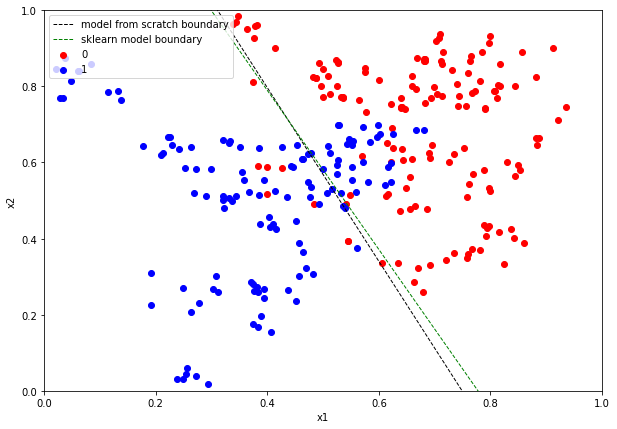

In [ ]:
def compute_boundary(B0,B1,B2,xmin, xmax):
  #boundary 
  c = -B0/B2
  m = -B1/B2
  xd = np.array([xmin, xmax])
  yd = m*xd + c
  return xd,yd

class0x1 = []
class0x2 = []
class1x1 = []
class1x2 = []
classy0 = []
classy1 = []
for (index,x),(index2,y) in zip(X_test.iterrows(),y_test.iterrows()):
  x1 = x['Variance of Wavelet Transformed image']
  x2 = x['Skewness of Wavelet Transformed image']
  y_i = y['Class']
  if y_i == 0:
    class0x1.append(x1)
    class0x2.append(x2)
    classy0.append(y_i)

  else:
    class1x1.append(x1)
    class1x2.append(x2)
    classy1.append(y_i)
  

plt.figure(figsize=(10,7))
plt.scatter(class0x1, class0x2, label='0', c='r')
plt.scatter(class1x1, class1x2, label='1', c='b')
xmin, xmax = 0, 1
ymin, ymax = 0, 1
xd,yd = compute_boundary(B0,B1,B2,xmin, xmax)
plt.plot(xd, yd, 'k', lw=1, ls='--',label='model from scratch boundary')
xd_sk,yd_sk = compute_boundary(B0_sk,B1_sk,B2_sk,xmin, xmax)
plt.plot(xd_sk, yd_sk, 'k', lw=1, ls='--',label='sklearn model boundary',c='g')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)


plt.legend(loc="upper left")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

#Logistic Regression pt.2#

In [5]:
#let's inspect the case when using all the 4 input vaiable to predict the binary output
#normalization
X2 = banknoteData.iloc[:,[0,1,2,3]]
y2 = banknoteData.loc[:,'Class'].values
X2_=(X2-X2.min())/(X2.max()-X2.min())
X2_.head()


,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Kurtosis of Wavelet Transformed image,Entropy of image
0,0.769004,0.839643,0.106783,0.736628
1,0.835659,0.820982,0.121804,0.644326
2,0.786629,0.416648,0.310608,0.786951
3,0.757105,0.871699,0.054921,0.450440
4,0.531578,0.348662,0.424662,0.687362


In [6]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X2, y2, random_state=42, test_size=0.2, shuffle=True)
print('N.samples in training set: ', len(X_train1))
print('N.samples in test set: ', len(X_test1))

N.samples in training set:  1097
N.samples in test set:  275


In [7]:
#sigmoid function
def logistic_function(pred):
  p = 1/(1+np.exp(-pred))
  return p

def logts_reg2(x1,x2,x3,x4,B0,B1,B2,B3,B4):
  lr_out = B0+B1*x1+B2*x2+B3*x3+B4*x4
  return lr_out

def get_predictions(pred):
  y_pred_a = 0
  if pred < 0.5: y_pred_a = 0
  else: y_pred_a = 1 
  return y_pred_a
  
#to estimate the coefficients we use SGD
#alpha = learning rate
def SGD_mod(X,Y,alpha, n_epochs):
  B0 = B1 = B2 = B3 = B4 = 0
  l_likelihood = 0
  log_like = 0
  acc_arr = []
  l_lhoods = []
  for epoch in range(n_epochs):
    tot_correct = 0
    tot_pred = 0
    for (index,x),y in zip(X.iterrows(),Y):
      x1 = x['Variance of Wavelet Transformed image']
      x2 = x['Skewness of Wavelet Transformed image']
      x3 = x['Kurtosis of Wavelet Transformed image']
      x4 = x['Entropy of image']
      y_true = y
      lr_out = logts_reg2(x1,x2,x3,x4,B0,B1,B2,B3,B4)
      y_pred =  logistic_function(lr_out)
      #log likelihhod
      step1 = y_true*np.log(y_pred)
      step2 =(1-y_true)*np.log(1-y_pred)
      l_likelihood1 = -step1-step2
      #parameters updating
      B0 = B0+alpha*(y_true - y_pred)
      B1 = B1+alpha*(y_true - y_pred)*x1
      B2 = B2+alpha*(y_true - y_pred)*x2
      B3 = B3+alpha*(y_true - y_pred)*x3
      B4 = B4+alpha*(y_true - y_pred)*x4
      #accuracy 
      y_pred_a = get_predictions(y_pred)
      if y_pred_a == y_true: tot_correct+=1
      tot_pred +=1

    log_like = np.mean(l_likelihood1)
    l_lhoods.append(log_like)
    accuracy = tot_correct/float(tot_pred)
    acc_arr.append(accuracy)
    print('>epoch=%d, lrate=%.3f, log likelihood=%.3f, accuracy=%.3f' % (epoch, lr, log_like,accuracy))
  
  return B0,B1,B2,B3,B4,l_lhoods,acc_arr

In [8]:
n_epochs = 100
lr = 0.001
B0,B1,B2,B3,B4,l_lhoods,acc_arr = SGD_mod(X_train1,y_train1,lr,n_epochs)
print(' end training phase ---------------------------------------------')
print('B0:',B0)
print('B1', B1)
print('B2', B2)
print('B3', B3)
print('B4', B4)

>epoch=0, lrate=0.001, log likelihood=0.214, accuracy=0.874
>epoch=1, lrate=0.001, log likelihood=0.196, accuracy=0.947
>epoch=2, lrate=0.001, log likelihood=0.185, accuracy=0.955
>epoch=3, lrate=0.001, log likelihood=0.180, accuracy=0.960
>epoch=4, lrate=0.001, log likelihood=0.176, accuracy=0.964
>epoch=5, lrate=0.001, log likelihood=0.174, accuracy=0.967
>epoch=6, lrate=0.001, log likelihood=0.172, accuracy=0.970
>epoch=7, lrate=0.001, log likelihood=0.171, accuracy=0.973
>epoch=8, lrate=0.001, log likelihood=0.171, accuracy=0.974
>epoch=9, lrate=0.001, log likelihood=0.170, accuracy=0.974
>epoch=10, lrate=0.001, log likelihood=0.170, accuracy=0.975
>epoch=11, lrate=0.001, log likelihood=0.170, accuracy=0.976
>epoch=12, lrate=0.001, log likelihood=0.170, accuracy=0.978
>epoch=13, lrate=0.001, log likelihood=0.170, accuracy=0.978
>epoch=14, lrate=0.001, log likelihood=0.170, accuracy=0.978
>epoch=15, lrate=0.001, log likelihood=0.171, accuracy=0.978
>epoch=16, lrate=0.001, log likeli

*Comparison with SKlearn model*

In [9]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(X_train1,y_train1)
B0_sk = lgr.intercept_[0]
B1_sk,B2_sk,B3_sk,B4_sk = lgr.coef_[0]
#sklearn model coefficients
print('B0 sklearn:', B0_sk)
print('B1 sklearn:', B1_sk)
print('B2 sklearn:', B2_sk)
print('B3 sklearn:', B3_sk)
print('B4 sklearn:', B4_sk)

B0 sklearn: 3.510583086651069
B1 sklearn: -3.260214806733191
B2 sklearn: -1.7885609510276754
B3 sklearn: -2.18251008953462
B4 sklearn: -0.037619789364035094


**Accuracy and cost plots**

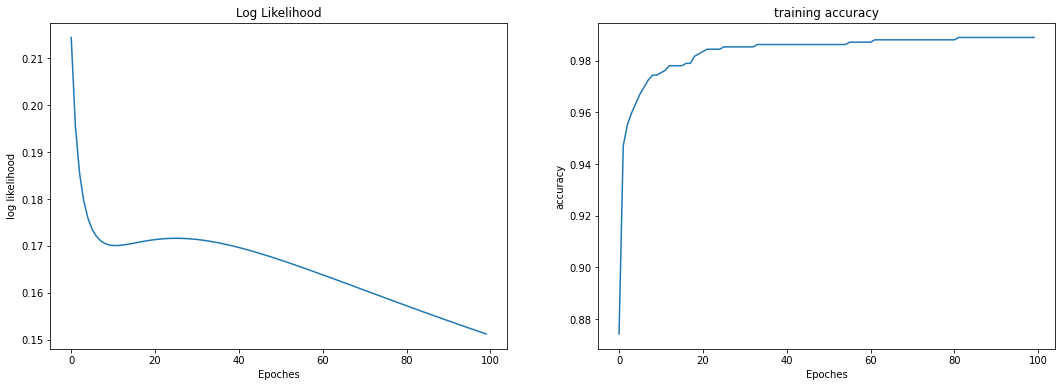

In [10]:
#values for logistic regression from scratch
n_epoches = [x for x in range(0,n_epochs)]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
ax1.plot(n_epoches,l_lhoods)
ax1.set_xlabel('Epoches')
ax1.set_ylabel('log likelihood')
ax1.set_title('Log Likelihood')

ax2.plot(n_epoches,acc_arr)
ax2.set_xlabel('Epoches')
ax2.set_ylabel('accuracy')
ax2.set_title('training accuracy')
plt.show()

**Test Phase**

*Logistic Regression from scratch accuracy*

In [11]:
def test_phase(B0,B1,B2,B3,B4,X,Y):
  correct_preds = 0
  tot_preds = 0
  y_preds = []
  y_preds_plot = []
  for (index,x),y in zip(X.iterrows(),Y):
    x1 = x['Variance of Wavelet Transformed image']
    x2 = x['Skewness of Wavelet Transformed image']
    x3 = x['Kurtosis of Wavelet Transformed image']
    x4 = x['Entropy of image']
    y_true = y
    lr_out = logts_reg2(x1,x2,x3,x4,B0,B1,B2,B3,B4)
    y_pred =  logistic_function(lr_out)
    y_pred_a = get_predictions(y_pred)
    #computing accuracy of the model
    if y_pred_a == y_true: correct_preds+=1
    tot_preds +=1
    y_preds.append(y_pred_a)
  print(f'model accuracy: {correct_preds/tot_preds}')
  return y_preds

y_preds = test_phase(B0,B1,B2,B3,B4,X_test1,y_test1)
confusion_m = confusion_matrix(y_test1, y_preds)
print('confusion matrix for model trained from scratch: \n', confusion_m)
print(classification_report(y_test1, y_preds))

model accuracy: 0.9854545454545455
confusion matrix for model trained from scratch: 
 [[146   2]
 [  2 125]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



*Sklearn Logistic Regression accuracy*

In [12]:
y_pred_sk = lgr.predict(X_test1)
cm = confusion_matrix(y_test1, y_pred_sk)
print ("Confusion Matrix : \n", cm)
print ("Accuracy : ", accuracy_score(y_test1, y_pred_sk))
print(classification_report(y_test1, y_pred_sk))

Confusion Matrix : 
 [[146   2]
 [  2 125]]
Accuracy :  0.9854545454545455
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       148
           1       0.98      0.98      0.98       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

